             s_adjclose  mkt_adjclose     MA_STOCK         l/s buy_or_sell  \
Date                                                                         
2019-03-20  1797.270020   2824.229980  1656.371802  140.898218        long   
2019-03-21  1819.260010   2854.879883  1659.625403  159.634607        long   
2019-03-22  1764.770020   2800.709961  1661.732402  103.037617        long   
2019-03-25  1774.260010   2798.360107  1664.093203  110.166807        long   
2019-03-26  1783.760010   2818.459961  1666.957202  116.802808        long   
2019-03-27  1765.699951   2805.370117  1669.927002   95.772949        long   
2019-03-28  1773.420044   2815.439941  1671.904202  101.515842        long   
2019-03-29  1780.750000   2834.399902  1673.843601  106.906399        long   
2019-04-01  1814.189941   2867.189941  1676.263000  137.926941        long   
2019-04-02  1813.979980   2867.239990  1678.618601  135.361379        long   
2019-04-03  1820.699951   2873.399902  1682.389199  138.310752  

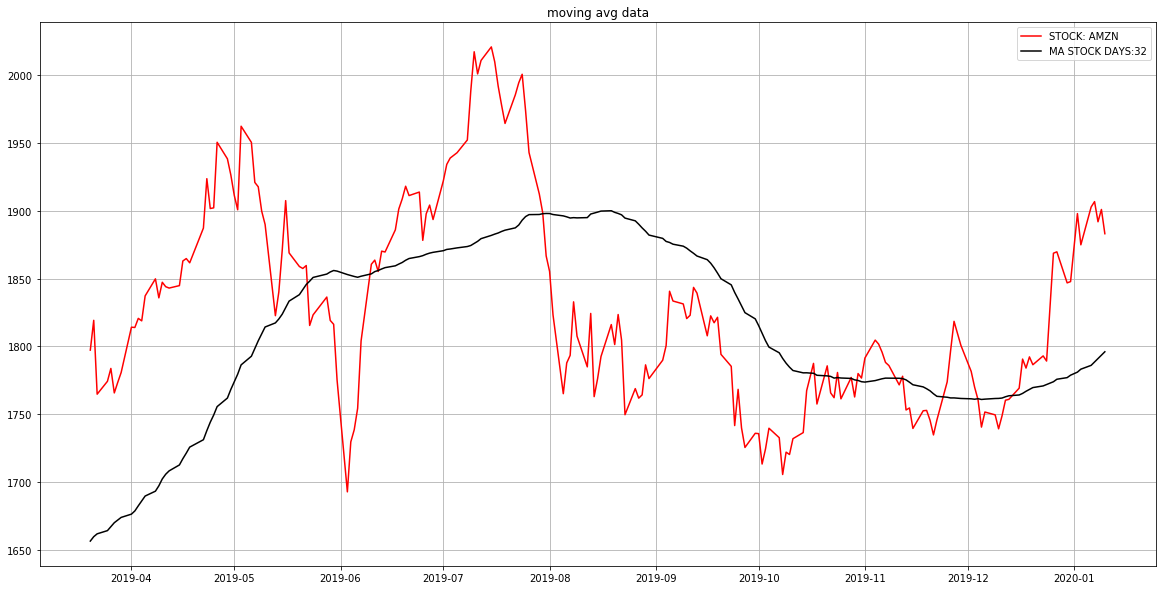

In [78]:
import pandas_datareader as pdr
from pandas_datareader import data, wb
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def movavg(start_date, end_date, ticker1, ticker2):
    #get the data from Yahoo Finance
    stock1 = pdr.get_data_yahoo(ticker1, start_date, end_date)
    stock2 = pdr.get_data_yahoo(ticker2, start_date, end_date)
    #dt = pd.to_datetime(start_date, format='%Y/%m/%d') #
    #dt1 = pd.to_datetime(end_date, format='%Y/%m/%d')
    #day_tim= (dt1-dt).days
    #print(day_tim)
 
    return_stock1 = stock1.resample('W').last()
    return_stock2 = stock2.resample('W').last()
    #print(return_stock1)

    data = pd.DataFrame({'s_adjclose': stock1['Adj Close'], 'mkt_adjclose': stock2['Adj Close']})#, index=return_stock1.index)
    x=50
    #natural logarithm of the returns
    #data[['s_returns', 'm_returns']] = np.log(data[['s_adjclose','m_adjclose']]/data[['s_adjclose','m_adjclose']].shift(1))
    data['MA_STOCK'] = data['s_adjclose'].rolling(x).mean() 
    data['l/s']=data['s_adjclose']-data['s_adjclose'].rolling(x).mean()
    data['buy_or_sell'] = data['l/s'].apply(lambda x: 'long' if x >= 0 else 'short')
    data['p/l']=data['buy_or_sell'].apply(lambda x: 4 if x == 'long' else 0)
    data = data.dropna()
    print(data)
    
    
    fig,axis = plt.subplots(1,figsize=(20,10))
    #plt.plot(data["s_adjclose"],label= 'stock 1',color='red')
    plt.plot(data['s_adjclose'],label= 'STOCK: %s'%s1,color='red')
    #plt.plot(data["norm_mkt_price"],label= 'normalized market',color='blue')
    plt.plot(data['MA_STOCK'],label= 'MA STOCK DAYS:%x'%x,color='black')
    plt.title('moving avg data')
    plt.legend()
    plt.grid(True)
    plt.show()
    
if __name__ == "__main__":
    #using historical data 2010-2017: the market is the S&P500 !!!
    s1='AMZN'
    m1='^GSPC'
    movavg('2019-01-08', '2020-01-10',s1,m1)
    #plot_data(s1)  
    